In [ ]:
%cd "/content/drive/MyDrive/My Projects/IMDB-sentiment-analysis"

/content/drive/MyDrive/My Projects/IMDB-sentiment-analysis


In [ ]:
!pip install lime

     |████████████████████████████████| 275 kB 5.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=5584abd8e2708c2e8cdfbcdc6221e9ec576ad573aca9bde489e727f1dcbc4fc9
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re

In [ ]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# to show the whole column values
pd.set_option('display.max_colwidth', None)

In [ ]:
data = pd.read_csv("cleaned_data.csv")
data = data.drop("Unnamed: 0" , axis=1)
data.head()

,review,sentiment
0,one review mention watch oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side,1
1,wonder littl product film techniqu unassum old time bbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done,1
2,thought wonder way spend time hot summer weekend sit air condit theater watch light heart comedi plot simplist dialogu witti charact likabl even well bread suspect serial killer may disappoint realiz match point risk addict thought proof woodi allen still fulli control style mani us grown love laugh one woodi comedi year dare say decad never impress scarlet johanson manag tone sexi imag jump right averag spirit young woman may crown jewel career wittier devil wear prada interest superman great comedi go see friend,1
3,basic famili littl boy jake think zombi closet parent fight time movi slower soap opera suddenli jake decid becom rambo kill zombi ok first go make film must decid thriller drama drama movi watchabl parent divorc argu like real life jake closet total ruin film expect see boogeyman similar movi instead watch drama meaningless thriller spot well play parent descent dialog shot jake ignor,0
4,petter mattei love time money visual stun film watch mr mattei offer us vivid portrait human relat movi seem tell us money power success peopl differ situat encount variat arthur schnitzler play theme director transfer action present time new york differ charact meet connect one connect one way anoth next person one seem know previou point contact stylishli film sophist luxuri look taken see peopl live world live habitat thing one get soul pictur differ stage loneli one inhabit big citi exactli best place human relat find sincer fulfil one discern case peopl encount act good mr mattei direct steve buscemi rosario dawson carol kane michael imperioli adrian grenier rest talent cast make charact come aliv wish mr mattei good luck await anxious next work,1


In [ ]:
data.shape

(50000, 2)

In [ ]:
X = data.drop("sentiment", axis = 1)
y = data["sentiment"]

In [ ]:
# convert dataframe format into list format in order to
# pass the list into the tfidf object
X = list(X["review"].values)

### Feature Representation With TF-IDF

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, shuffle=True,
                                                     test_size=0.2, random_state=1)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=10000)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [ ]:
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 10000,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
tfidf.get_feature_names()[:15]

['aamir',
 'aaron',
 'ab',
 'abandon',
 'abba',
 'abbey',
 'abbi',
 'abbott',
 'abc',
 'abduct',
 'abid',
 'abigail',
 'abil',
 'abl',
 'abli']

In [ ]:
doc_matrix = pd.DataFrame(X_train , columns =tfidf.get_feature_names())
doc_matrix

,aamir,aaron,ab,abandon,abba,abbey,abbi,abbott,abc,abduct,abid,abigail,abil,abl,abli,abnorm,aboard,abomin,aborigin,abort,abound,abraham,abroad,abrupt,abruptli,absenc,absent,absolut,absorb,abstract,absurd,absurdli,abu,abund,abus,abysm,abyss,academ,academi,acceler,...,yorker,young,younger,youngest,youngster,youth,youtub,yr,yuck,yugoslavia,yul,yup,yuppi,yusuf,yuzna,zach,zane,zani,zap,zatoichi,zealand,zelah,zellweg,zen,zero,zeta,zhang,zip,zizek,zodiac,zoe,zoey,zombi,zone,zoo,zoom,zorro,zu,zucco,zucker
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.092436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.031824,0.049089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

previous_score = 0
for i in np.arange(0 , 1 , 0.1):
  sub_classifier = MultinomialNB(alpha = i)
  sub_classifier.fit(X_train , y_train)
  score = sub_classifier.score(X_test , y_test)
  print("Test set score : " , score)
  if score > previous_score:
    classifier = sub_classifier
    previous_score = score
  else:
    continue

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Test set score :  0.8556
Test set score :  0.8556
Test set score :  0.8561
Test set score :  0.8562
Test set score :  0.8563
Test set score :  0.8566
Test set score :  0.8567
Test set score :  0.8571
Test set score :  0.857
Test set score :  0.8567


### Model Evaluation

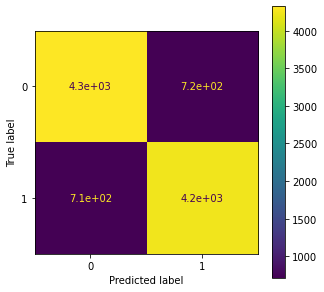

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 5, 5
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

### Cross-Validation

In [ ]:
X = np.concatenate([X_train , X_test] , axis = 0)
y = np.concatenate([y_train , y_test] , axis = 0)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold_cv = KFold(10 , shuffle=True)
acc_results = cross_val_score(classifier , X , y , cv = kfold_cv)
print(acc_results)

[0.8432 0.8554 0.8574 0.8472 0.8632 0.8658 0.8532 0.8522 0.8516 0.8588]


In [ ]:
print("The mean of MSE scores is : " , round(np.sum(acc_results) / acc_results.shape[0] , 4) * 100 , "%")

The mean of MSE scores is :  85.48 %


In [ ]:
# Most common words that were used in positive reviews 
features = tfidf.get_feature_names()
sorted(zip(classifier.coef_[0] , features) , reverse = True)[:20]

[(-5.01582974924219, 'film'),
 (-5.0242143204858, 'movi'),
 (-5.590464165589039, 'one'),
 (-5.768251530389266, 'like'),
 (-5.776993861435912, 'great'),
 (-5.857258582892701, 'love'),
 (-5.8604282017816836, 'good'),
 (-5.877701863105454, 'see'),
 (-5.889112356511455, 'time'),
 (-5.900260389718639, 'stori'),
 (-5.9468300374709635, 'watch'),
 (-5.984982645958209, 'well'),
 (-5.999972762336046, 'charact'),
 (-6.009791145351848, 'show'),
 (-6.0947813300472875, 'make'),
 (-6.101499627005607, 'realli'),
 (-6.13417434556489, 'get'),
 (-6.176333531684896, 'also'),
 (-6.180922802115295, 'best'),
 (-6.232915797841094, 'would')]

In [ ]:
# Most common words that were used in negative reviews 
sorted(zip(classifier.coef_[0] , features))[:20]

[(-12.341169147569358, 'appallingli'),
 (-12.341169147569358, 'bix'),
 (-12.341169147569358, 'carnosaur'),
 (-12.341169147569358, 'cornfield'),
 (-12.341169147569358, 'darkman'),
 (-12.341169147569358, 'delia'),
 (-12.341169147569358, 'fujimori'),
 (-12.341169147569358, 'kareena'),
 (-12.341169147569358, 'kasparov'),
 (-12.341169147569358, 'khari'),
 (-12.341169147569358, 'komodo'),
 (-12.341169147569358, 'kornbluth'),
 (-12.341169147569358, 'lommel'),
 (-12.341169147569358, 'piranha'),
 (-12.341169147569358, 'saif'),
 (-12.341169147569358, 'tashan'),
 (-12.341169147569358, 'uwe'),
 (-12.26135510980675, 'hobgoblin'),
 (-12.258734575591658, 'nostril'),
 (-12.248830704536532, 'mishmash')]

### Examining the Model Performance

In [ ]:
text = """DONT WATCH THIS MOVIE. its a complete trash"""

In [ ]:
ps = PorterStemmer()
CLEAN = re.compile("<.*?>")    # to remove everything between "<>"
result = re.sub(CLEAN, " ", text)
result = re.sub("[^a-zA-Z]" , " " , result)
result = result.lower()
result = result.split()   # to break sentences into words
word = [ps.stem(word) for word in result if word not in stopwords.words("english")]
result = " ".join(word)
print(result)

dont watch movi complet trash


In [ ]:
result = tfidf.transform([result]).toarray()

In [ ]:
result

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
pred = classifier.predict(result)
if pred[0] == 1:
    print("Positive")
else:
    print("Negative")

Negative


### Displaying Words with Word Cloud

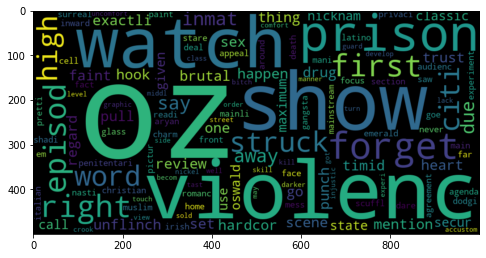

In [ ]:
from wordcloud import WordCloud,STOPWORDS
plt.rcParams["figure.figsize"] = 8, 8
positive_review = np.where(data["sentiment"] == 1)
WC = WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words = WC.generate(data["review"][positive_review[0][0]])
plt.imshow(positive_words, interpolation="bilinear")
plt.show()

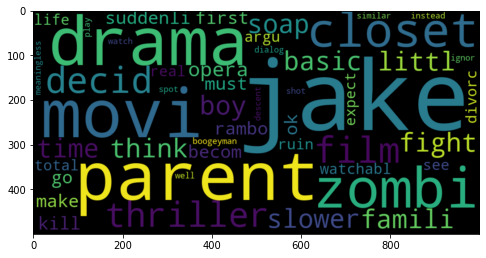

In [ ]:
negative_review = np.where(data["sentiment"] == 0)
WC = WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_review = WC.generate(data["review"][negative_review[0][0]])
plt.imshow(negative_review, interpolation="bilinear")
plt.show()

### Model Explainability with LIME

In [ ]:
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

In [ ]:
y_pred_prob = classifier.predict_proba(X_test)[:, 1]
c = make_pipeline(tfidf, classifier)
mystring = list(data["review"])[3]  #Take a string from test instance
class_names = ["Negative", "Positive"]
explainer = LimeTextExplainer(class_names=class_names)
exp = explainer.explain_instance(mystring, c.predict_proba, num_features=6)
keys = exp.as_list()

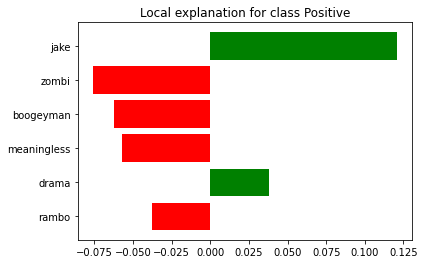

In [ ]:
%matplotlib inline
fig = exp.as_pyplot_figure()

In [ ]:
exp.show_in_notebook(text=data["review"][3])

### Saving The Model

In [ ]:
# import pickle
# file = open("model/sentiment-analyzer.pkl" , "wb")
# pickle.dump(classifier , file)